## Sentiment Analysis

### Importing Libraries

In [1]:
import re
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import plotly.express as px
import plotly.graph_objects as go

# Download VADER lexicon if you haven't already
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/snigdhaenumulapally/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
df_Preprocessed = pd.read_excel("Preprocessed_data.xlsx")

In [3]:
topics =  pd.read_excel("Twitter_topics.xlsx")

In [4]:
topics.head()

Tweet  \
0  @bitquark I am looking forward for a ChatGPT A...   
1  i think i broke chatGPT. it's been frozen for ...   
2  I like ChatGPT as much as the next guy, but th...   
3  It seems like sth. was changed here, because I...   
4  I know ChatGPT is just crawling for inputs. \n...   

                                              Tokens     Date  Dominant_Topic  \
0  ['looking', 'forward', 'api', 'lot', 'tools', ...  12/1/22               5   
1  ['think', 'broke', 'frozen', 'couple', 'minutes']  12/1/22               7   
2  ['like', 'guy', 'theres', 'twitter', 'im', 'lo...  12/1/22               6   
3  ['like', 'sth', 'changed', 'replicate', 'behav...  12/1/22               2   
4  ['know', 'crawling', 'inputs', 'nneven', 'make...  12/1/22               6   

   Contribution%                                Topic_Name  
0          46.86  T5 Content Creation and Ideas Generation  
1          35.49                 T7 Programming and Gaming  
2          39.30      T6 Impact on Education and Academics  
3          41.34     T2 Conversational AI and Bias in Data  
4          55.46      T6 Impact on Education and Academics

In [5]:
df = pd.merge(df_Preprocessed, topics[['Tweet', 'Date', 'Dominant_Topic', 'Contribution%', 'Topic_Name']], 
                     on=['Tweet', 'Date'])

In [6]:
df.head()

Date       UserName                                              Tweet  \
0  12/1/22       mazen160  @bitquark I am looking forward for a ChatGPT A...   
1  12/1/22  ZoumanaCisse6  i think i broke chatGPT. it's been frozen for ...   
2  12/1/22    DennisLibre  I like ChatGPT as much as the next guy, but th...   
3  12/1/22       mpaepper  It seems like sth. was changed here, because I...   
4  12/1/22     AaronSitze  I know ChatGPT is just crawling for inputs. \n...   

                Location  IsVerified_True extracted_hashtags  \
0  At a server near you.                0                 []   
1               Bay area                0                 []   
2                  Miami                0                 []   
3       Hamburg, Germany                0                 []   
4          Illinois, USA                0                 []   

                                         clean_tweet  \
0                looking forward api lot tools built   
1                  think broke frozen couple minutes   
2  like guy theres twitter im looking guy tweets ...   
3  like sth changed replicate behavior refuses wr...   
4  know crawling inputs nneven makes sad vision e...   

                                     tokenized_tweet  \
0  ['looking', 'forward', 'api', 'lot', 'tools', ...   
1  ['think', 'broke', 'frozen', 'couple', 'minutes']   
2  ['like', 'guy', 'theres', 'twitter', 'im', 'lo...   
3  ['like', 'sth', 'changed', 'replicate', 'behav...   
4  ['know', 'crawling', 'inputs', 'nneven', 'make...   

                                    lemmatized_tweet  \
0  ['looking', 'forward', 'api', 'lot', 'tools', ...   
1  ['think', 'broke', 'frozen', 'couple', 'minutes']   
2  ['like', 'guy', 'theres', 'twitter', 'im', 'lo...   
3  ['like', 'sth', 'changed', 'replicate', 'behav...   
4  ['know', 'crawling', 'inputs', 'nneven', 'make...   

                                       stemmed_tweet        country  \
0  ['look', 'forward', 'api', 'lot', 'tool', 'bui...        Unknown   
1     ['think', 'broke', 'frozen', 'coupl', 'minut']  United States   
2  ['like', 'guy', 'there', 'twitter', 'im', 'loo...  United States   
3  ['like', 'sth', 'chang', 'replic', 'behavior',...    Deutschland   
4  ['know', 'crawl', 'input', 'nneven', 'make', '...  United States   

   Dominant_Topic  Contribution%                                Topic_Name  
0               5          46.86  T5 Content Creation and Ideas Generation  
1               7          35.49                 T7 Programming and Gaming  
2               6          39.30      T6 Impact on Education and Academics  
3               2          41.34     T2 Conversational AI and Bias in Data  
4               6          55.46      T6 Impact on Education and Academics

### Sentiment Anlaysis on Pre Processed Dataset

- As we are calculating sentiment of short social media informal texts, SentimentIntensityAnalyzer is a good choice.

In [7]:
# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Get the sentiment scores for each tweet
df['sentiment_scores'] = df['clean_tweet'].apply(lambda tweet: sia.polarity_scores(tweet))

# Classify sentiment as positive, negative, or neutral
df['sentiment'] = df['sentiment_scores'].apply(lambda score: 'positive' if score['compound'] > 0.05 else ('negative' if score['compound'] < -0.05 else 'neutral'))


### 1. Overall sentiment of the dataset

In [8]:
print("Overall sentiment of the dataset:")
print(df['sentiment'].value_counts())

Overall sentiment of the dataset:
positive    355628
neutral     253646
negative    131298
Name: sentiment, dtype: int64


<AxesSubplot:>

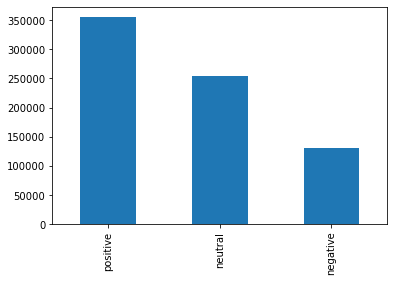

In [9]:
df['sentiment'].value_counts().plot(kind='bar')

### 2. Top 4 countries with positive and negative sentiments

In [10]:
df_country = pd.DataFrame(df[df['country']!='Unknown'])

print("\nTop 4 countries with positive and negative sentiments:")
positive_countries = df_country[df_country['sentiment'] == 'positive']['country'].value_counts().head(4)
negative_countries = df_country[df_country['sentiment'] == 'negative']['country'].value_counts().head(4)
print("Positive:")
print(positive_countries)
print("")
print("Negative:")
print(negative_countries)


Top 4 countries with positive and negative sentiments:
Positive:
United States     108957
United Kingdom     23185
India              20038
Canada             14207
Name: country, dtype: int64

Negative:
United States     40484
United Kingdom     8120
India              6459
Canada             4911
Name: country, dtype: int64


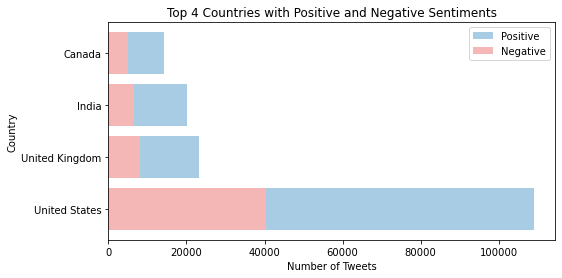

In [11]:
# Create stacked bar chart
countries = positive_countries.index.tolist()
fig, ax = plt.subplots(figsize=(8, 4))

# Create a color palette for the positive and negative sentiments
palette = {'positive': '#A9CCE5', 'negative': '#F5B7B5'}

ax.barh(countries, positive_countries, label='Positive', color=palette['positive'])
ax.barh(countries, negative_countries, label='Negative', color=palette['negative'])
ax.set_xlabel('Number of Tweets')
ax.set_ylabel('Country')
ax.legend(loc='upper right')
ax.set_title('Top 4 Countries with Positive and Negative Sentiments')

plt.show()

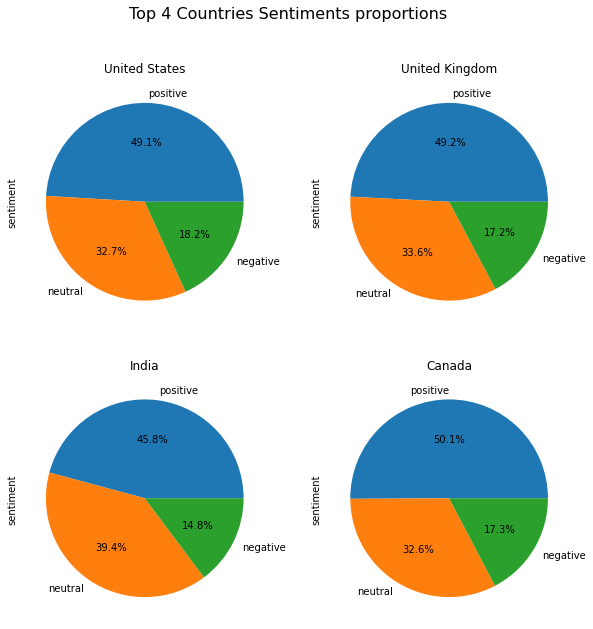

In [12]:
# plot pie charts for positive sentiments
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
fig.suptitle('Top 4 Countries Sentiments proportions', fontsize=16)
for i, country in enumerate(positive_countries.index):
    ax = axs[i//2, i%2] # select the right subplot
    df_country[df_country['country']==country]['sentiment'].value_counts().plot(kind='pie', ax=ax, autopct='%1.1f%%')
    ax.set_title(country)

plt.show()

### 3. Sentiments of users according to verification status

In [13]:
print("\nSentiments of users according to verification status:")
print(df.groupby('IsVerified_True')['sentiment'].value_counts())


Sentiments of users according to verification status:
IsVerified_True  sentiment
0                positive     340278
                 neutral      243525
                 negative     125293
1                positive      15350
                 neutral       10121
                 negative       6005
Name: sentiment, dtype: int64


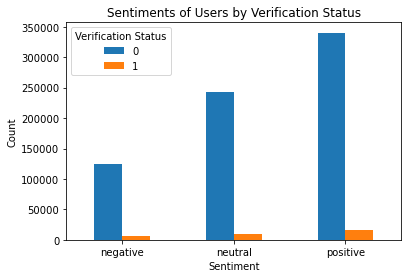

In [14]:
import matplotlib.pyplot as plt

sentiment_counts = df.groupby('IsVerified_True')['sentiment'].value_counts()
sentiment_counts.unstack(0).plot(kind='bar', rot=0)

plt.title('Sentiments of Users by Verification Status')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.legend(title='Verification Status', loc='best')
plt.show()

### 3. Sentiments with time

#### 1. Sentiment Counts each month

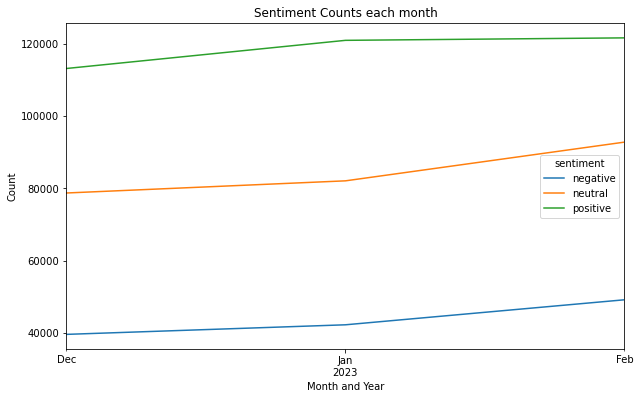

In [15]:
import matplotlib.pyplot as plt
eda = df.copy()
eda['Date'] = pd.to_datetime(eda['Date'])
# create a new column with the month and year of each tweet
eda['month_year'] = eda['Date'].dt.to_period('M')

# group the tweets by month and year and sentiment
sentiment_counts = eda.groupby(['month_year', 'sentiment']).size().unstack(fill_value=0)

# plot the sentiment counts over time
fig, ax = plt.subplots(figsize=(10,6))
sentiment_counts.plot(ax=ax)
ax.set_xlabel('Month and Year')
ax.set_ylabel('Count')
ax.set_title('Sentiment Counts each month')
plt.show()

#### 2. Change of Sentiment over Time

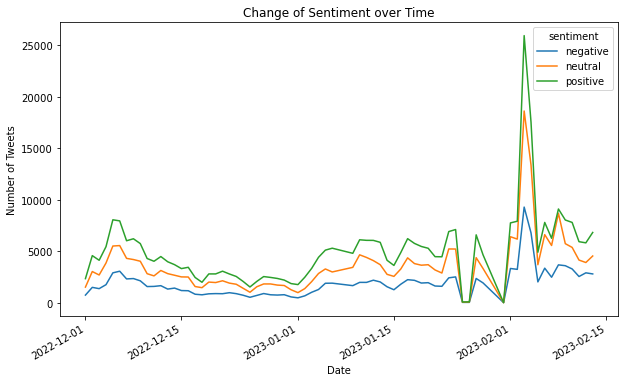

In [16]:
# Group data by date and sentiment
grouped = eda.groupby(['Date', 'sentiment'])['sentiment'].count().unstack()

# Create line plot
fig, ax = plt.subplots(figsize=(10, 6))
grouped.plot(ax=ax)
ax.set_title('Change of Sentiment over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Tweets')
plt.show()

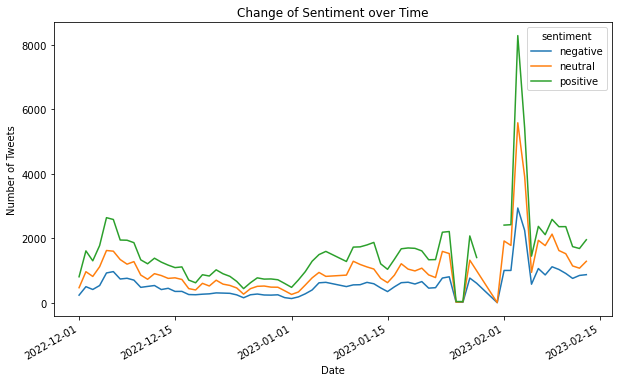

In [17]:
# Group data by date and sentiment for United States
eda_us = eda[eda['country'] == 'United States']
grouped = eda_us.groupby(['Date', 'sentiment'])['sentiment'].count().unstack()

# Create line plot
fig, ax = plt.subplots(figsize=(10, 6))
grouped.plot(ax=ax)
ax.set_title('Change of Sentiment over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Tweets')
plt.show()

In [18]:
start_date = '2023-01-24'
end_date = '2023-02-06'
mask = ((eda['Date'] >= start_date) & (eda['Date'] <= end_date))
df_range = eda.loc[mask]

In [19]:
df_range.head()

Date       UserName  \
438578 2023-01-24    CurtisSpyro   
438579 2023-01-24    ___Derry___   
438580 2023-01-24     avidtrober   
438581 2023-01-24  educationweek   
438582 2023-01-24  EONRealityInc   

                                                    Tweet  \
438578  Google Calls In Larry Page and Sergey Brin to ...   
438579  Our Sr. SEO Director Lily Ray sat down with eM...   
438580  @DarrenJBeattie ChatGPT is a genius, ... https...   
438581  Is #ChatGPT the new teacherâ€™s aide? ðŸ” htt...   
438582  An example of how schools can use ChatGPT and ...   

                    Location  IsVerified_True  \
438578       Los Angeles, CA                0   
438579         Nashville, TN                0   
438580        The Heavenlies                0   
438581          Bethesda, MD                1   
438582  Irvine, CA Global HQ                1   

                                       extracted_hashtags  \
438578  ['#Cars', '#Computers', '#Smartphones', '#NewT...   
438579                                      ['#ChatGPT.']   
438580                                                 []   
438581                                       ['#ChatGPT']   
438582  ['#ArtificialIntelligence', '#Technology', '#Y...   

                                              clean_tweet  \
438578  google calls larry page sergey brin tackle cha...   
438579  sr seo director lily ray sat emarketers inside...   
438580                                             genius   
438581                                  new teachers aide   
438582  example schools use general improve lesson pla...   

                                          tokenized_tweet  \
438578  ['google', 'calls', 'larry', 'page', 'sergey',...   
438579  ['sr', 'seo', 'director', 'lily', 'ray', 'sat'...   
438580                                         ['genius']   
438581                        ['new', 'teachers', 'aide']   
438582  ['example', 'schools', 'use', 'general', 'impr...   

                                         lemmatized_tweet  \
438578  ['google', 'calls', 'larry', 'page', 'sergey',...   
438579  ['sr', 'seo', 'director', 'lily', 'ray', 'sat'...   
438580                                         ['genius']   
438581                        ['new', 'teachers', 'aide']   
438582  ['example', 'schools', 'use', 'general', 'impr...   

                                            stemmed_tweet        country  \
438578  ['googl', 'call', 'larri', 'page', 'sergey', '...  United States   
438579  ['sr', 'seo', 'director', 'lili', 'ray', 'sat'...  United States   
438580                                          ['geniu']        Unknown   
438581                          ['new', 'teacher', 'aid']  United States   
438582  ['exampl', 'school', 'use', 'gener', 'improv',...        Unknown   

        Dominant_Topic  Contribution%  \
438578               1          79.13   
438579               5          48.56   
438580               8          56.24   
438581               5          78.06   
438582               6          31.39   

                                      Topic_Name  \
438578          T1 Competition of Search Engines   
438579  T5 Content Creation and Ideas Generation   
438580            T8 Natural Language Processing   
438581  T5 Content Creation and Ideas Generation   
438582      T6 Impact on Education and Academics   

                                         sentiment_scores sentiment month_year  
438578  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   neutral    2023-01  
438579  {'neg': 0.0, 'neu': 0.772, 'pos': 0.228, 'comp...  positive    2023-01  
438580  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   neutral    2023-01  
438581  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   neutral    2023-01  
438582  {'neg': 0.209, 'neu': 0.613, 'pos': 0.178, 'co...  negative    2023-01

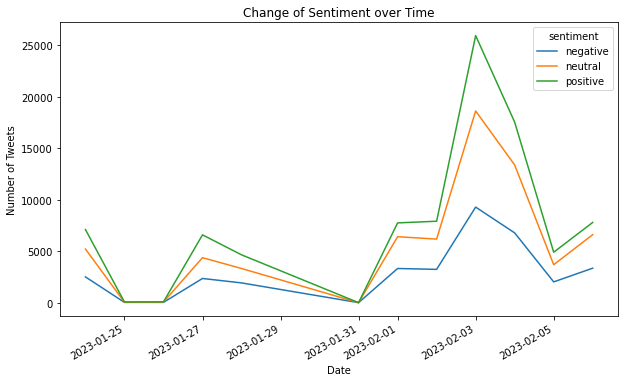

In [20]:
# Group data by date and sentiment for United States
grouped = df_range.groupby(['Date', 'sentiment'])['sentiment'].count().unstack()

# Create line plot
fig, ax = plt.subplots(figsize=(10, 6))
grouped.plot(ax=ax)
ax.set_title('Change of Sentiment over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Tweets')
plt.show()

In [21]:
dates = ['2023-01-25', '2023-01-26', '2023-01-31']
df_dates = df_range[df_range['Date'].isin(dates)]

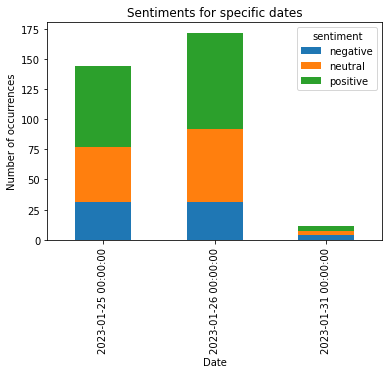

In [22]:
# group by date and sentiment, and count the number of occurrences
grouped = df_dates.groupby(['Date', 'sentiment'])['sentiment'].count().unstack().fillna(0)

# plot the results as a bar chart
grouped.plot(kind='bar', stacked=True)

# set the chart title and axis labels
plt.title('Sentiments for specific dates')
plt.xlabel('Date')
plt.ylabel('Number of occurrences')

# show the chart
plt.show()

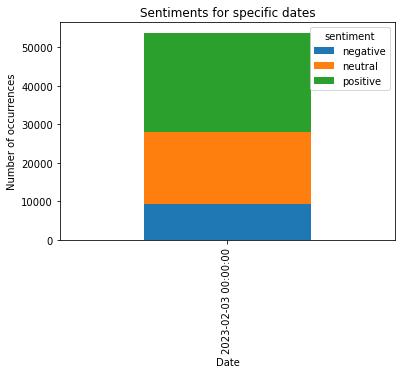

In [23]:
date = ['2023-02-03']
df_date = df_range[df_range['Date'].isin(date)]

# group by date and sentiment, and count the number of occurrences
group = df_date.groupby(['Date', 'sentiment'])['sentiment'].count().unstack().fillna(0)

# plot the results as a bar chart
group.plot(kind='bar', stacked=True)

# set the chart title and axis labels
plt.title('Sentiments for specific dates')
plt.xlabel('Date')
plt.ylabel('Number of occurrences')

# show the chart
plt.show()

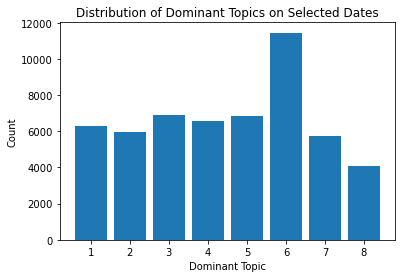

In [24]:
topic_counts = df_date.Dominant_Topic.value_counts()
plt.bar(topic_counts.index, topic_counts.values)
plt.xlabel('Dominant Topic')
plt.ylabel('Count')
plt.title('Distribution of Dominant Topics on Selected Dates')
plt.show()

- Most discussed topic on this date is Topic 6: Impact on Education and Academics

#### Worldwide Change of Sentiment over Time

In [25]:
import plotly.express as px

# Group the data by location and date
grouped = df.groupby(['country', 'Date'])['sentiment'].value_counts(normalize=True).rename('prop').reset_index()


# Get the rows that contain the maximum sentiment proportion for each location and date
max_sentiment = grouped.groupby(['country', 'Date'])['prop'].max().reset_index()
max_sentiment = max_sentiment.merge(grouped, on=['country', 'Date', 'prop'])

# Create a choropleth map
fig = px.choropleth(max_sentiment, locations='country', locationmode='country names', color='sentiment', 
                    animation_frame='Date', animation_group='country', range_color=[0,1], 
                    color_discrete_map={'positive':'green', 'negative':'red', 'neutral':'gray'},
                    labels={'Sentiment':'Sentiment Proportion'})

# Set the width and height of the figure
fig.update_layout(width=1000, height=600)

# Show the map
fig.show()

#### Regional differences in sentiment: 
- It's important to note that regional differences in sentiment may be influenced by a variety of factors, including cultural norms, political climate, and economic conditions. 
- However, based on the analysis we've done, it seems that the United States, Canada, Australia and India have had more Positive sentiment expressed in tweets over time compared to other countries. 
- On the other hand, South American and South African countries have fluctuating sentiments throughout. 

### Topicwise Sentiment Analysis

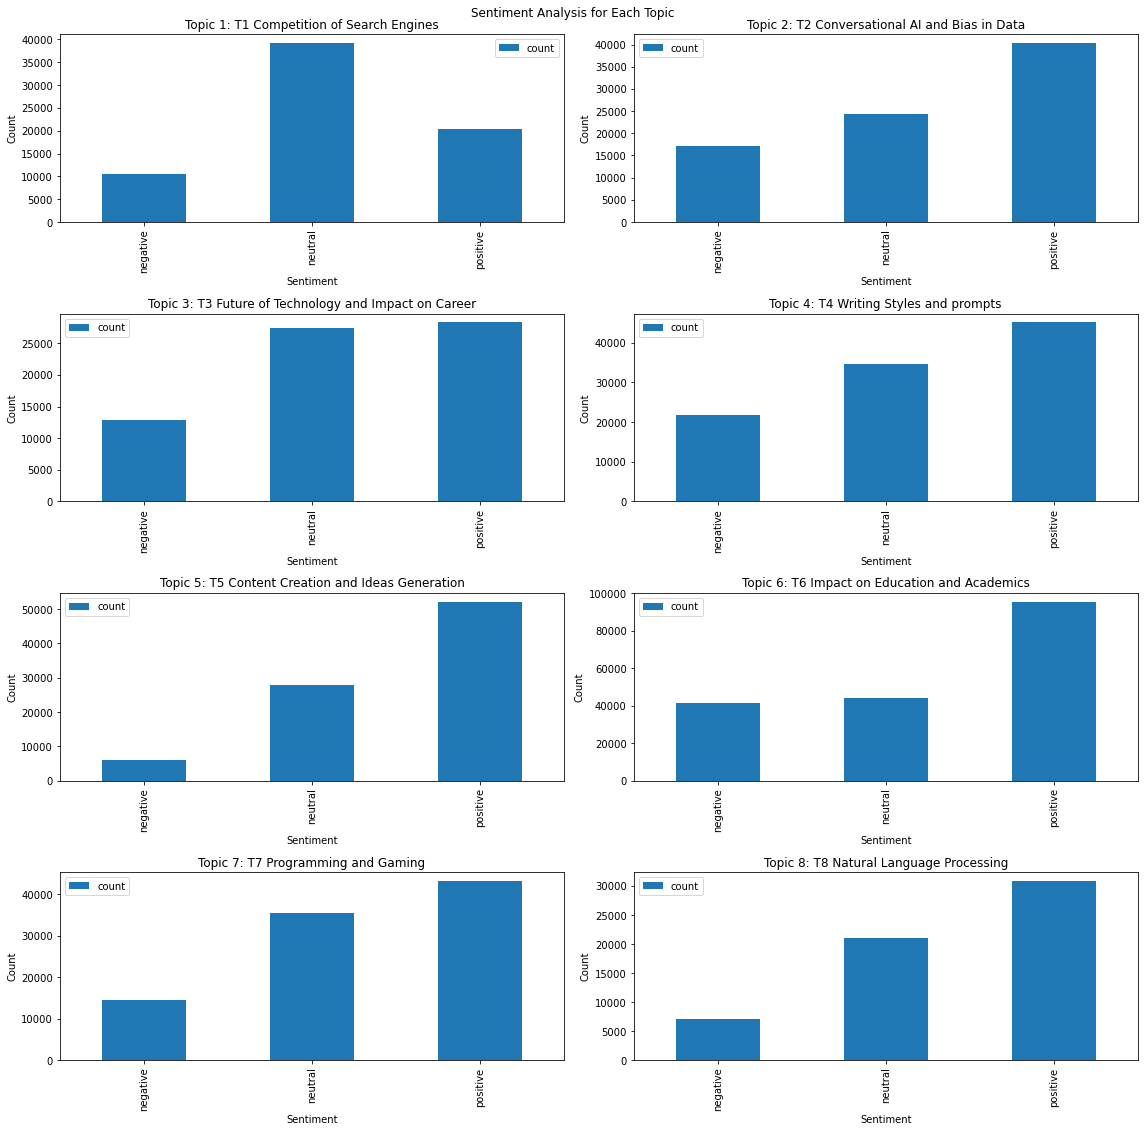

In [26]:
# group data by topic and sentiment
grouped_df = df.groupby(['Dominant_Topic','Topic_Name', 'sentiment']).size().reset_index(name='count')

# create subplots
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(16,16))
fig.suptitle('Sentiment Analysis for Each Topic')

# plot each topic
for i, (topic, topic_df) in enumerate(grouped_df.groupby('Dominant_Topic')):
    ax = axs[i//2, i%2]  # select the right subplot
    topic_name = topic_df.iloc[0]['Topic_Name']
    ax.set_title(f'Topic {topic}: {topic_name}')
    topic_df.plot(kind='bar', x='sentiment', y='count', ax=ax)
    ax.set_xlabel('Sentiment')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

- Topic Number: Topic Name: More number of tweets
- Topic 1: Competition of Search Engines : Neutral 
- Topic 2: Conversational AI and Bias in Data: Positive 
- Topic 3: Future of Technology and Impact on Career: Positive and Neutral
- Topic 4: Writing Styles and prompts : Positive
- Topic 5: Content Creation and Ideas Generation: Positive
- Topic 6: Impact on Education and Academia: Positive
- Topic 7: Programming and Gaming: Positive and Neutral
- Topic 8: Natural Language Processing: Positive

Comparitively More number of negative tweets related to Chat GPT are on 
1. Impact on Education and Academia
2. Conversational AI and Bias in Data
3. Future of Technology and Impact on Career

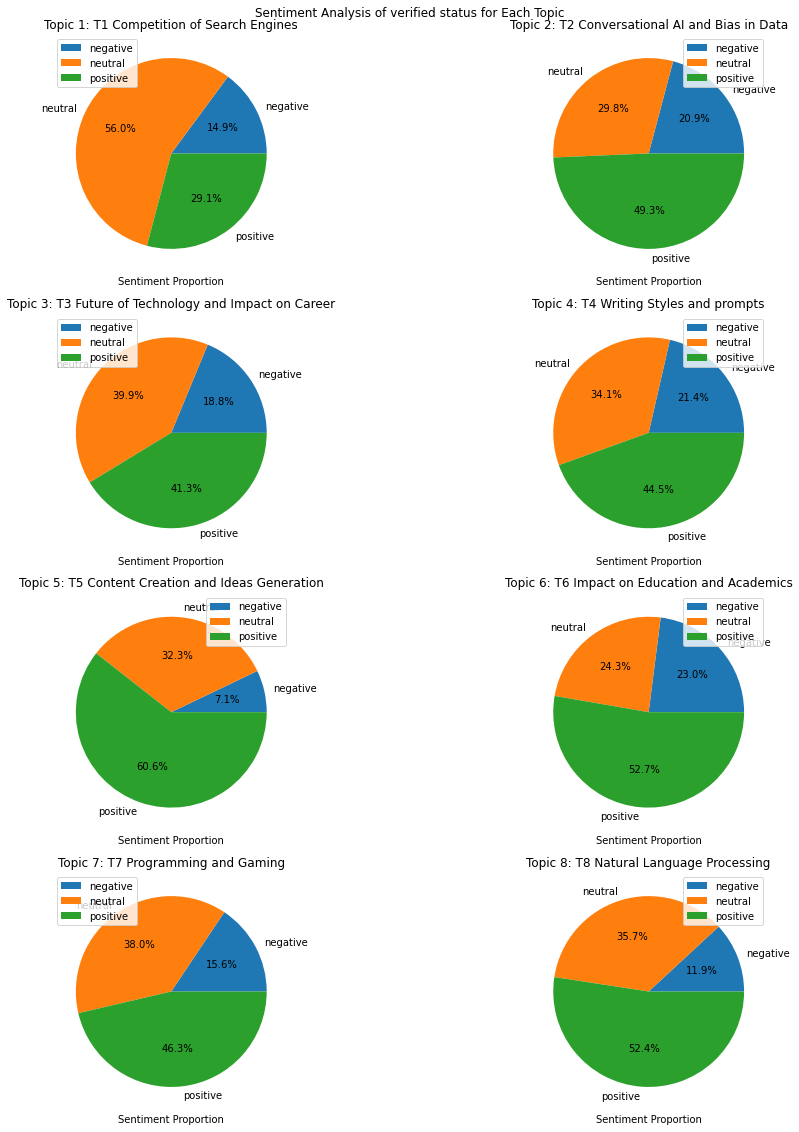

In [27]:
# create subplots
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(16,16))
fig.suptitle('Sentiment Analysis of verified status for Each Topic')

# plot each topic
for i, (topic, topic_df) in enumerate(grouped_df.groupby('Dominant_Topic')):
    ax = axs[i//2, i%2]  # select the right subplot
    topic_name = topic_df.iloc[0]['Topic_Name']
    ax.set_title(f'Topic {topic}: {topic_name}')
    topic_count = topic_df['count'].sum()
    topic_df['proportion'] = topic_df['count'] / topic_count
    topic_df.plot(kind='pie', y='proportion', labels=topic_df['sentiment'], autopct='%1.1f%%', ax=ax)
    ax.set_xlabel('Sentiment Proportion')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

## Topics mostly discussed by verified status

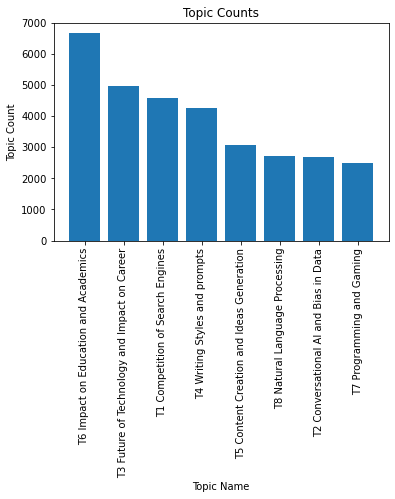

In [28]:
import seaborn as sns

verified_df  = df[df['IsVerified_True'] == 1]
topic_df = verified_df.groupby(['Dominant_Topic', 'Topic_Name']).size().reset_index(name='count')

# Sort the data by count in descending order
topic_df = topic_df.sort_values('count', ascending=False)

# Create a bar plot of the topic counts
plt.bar(x=topic_df['Topic_Name'], height=topic_df['count'])
plt.xticks(rotation=90)
plt.xlabel('Topic Name')
plt.ylabel('Topic Count')
plt.title('Topic Counts')
plt.show()

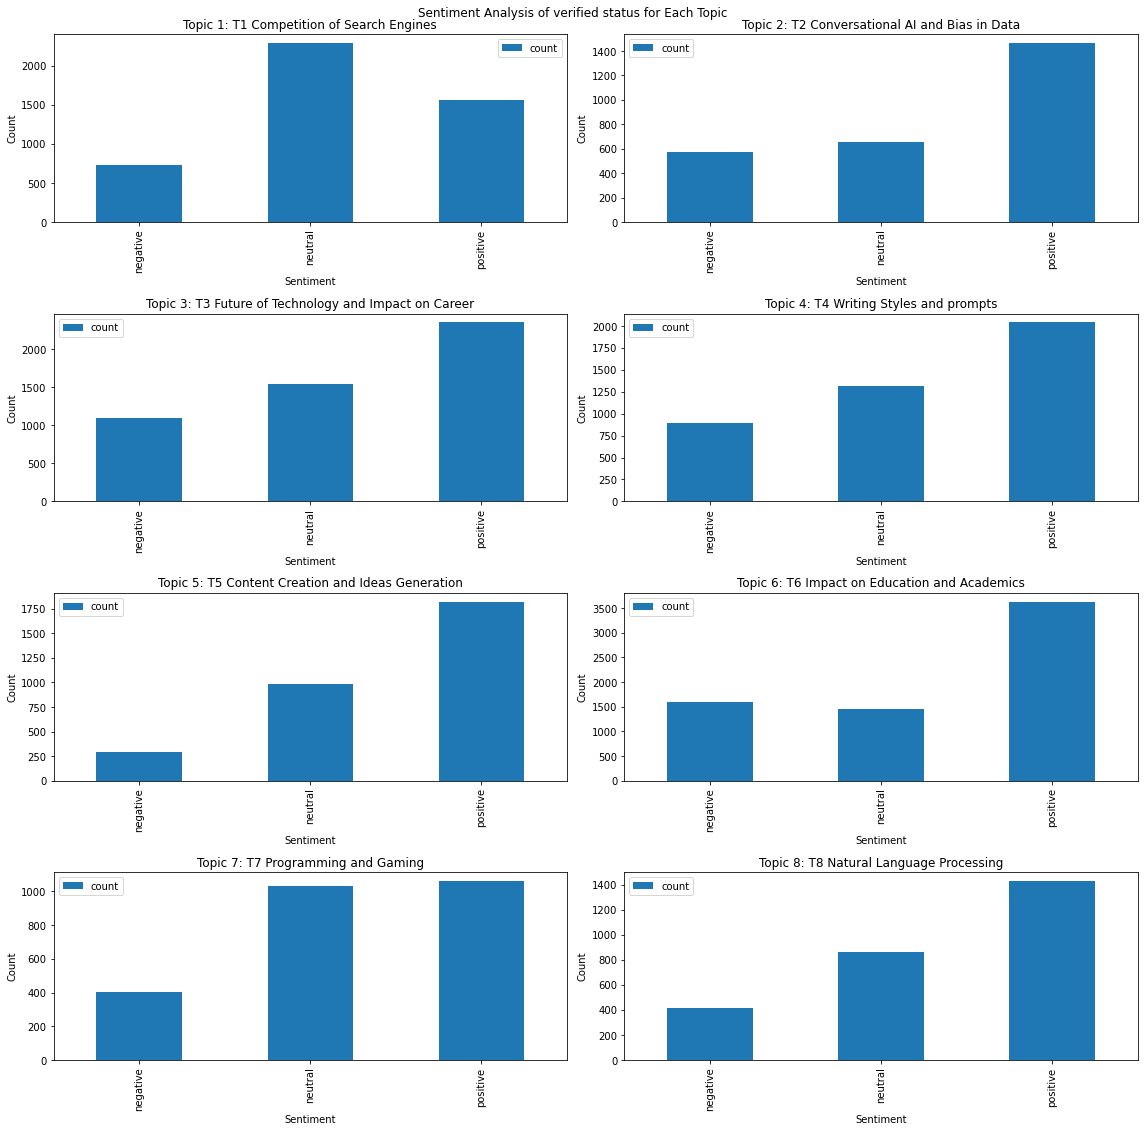

In [29]:
# group data by topic and sentiment
sentiment_df = verified_df.groupby(['Dominant_Topic','Topic_Name', 'sentiment']).size().reset_index(name='count')

# create subplots
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(16,16))
fig.suptitle('Sentiment Analysis of verified status for Each Topic')

# plot each topic
for i, (topic, topic_df) in enumerate(sentiment_df.groupby('Dominant_Topic')):
    ax = axs[i//2, i%2]  # select the right subplot
    topic_name = topic_df.iloc[0]['Topic_Name']
    ax.set_title(f'Topic {topic}: {topic_name}')
    topic_df.plot(kind='bar', x='sentiment', y='count', ax=ax)
    ax.set_xlabel('Sentiment')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

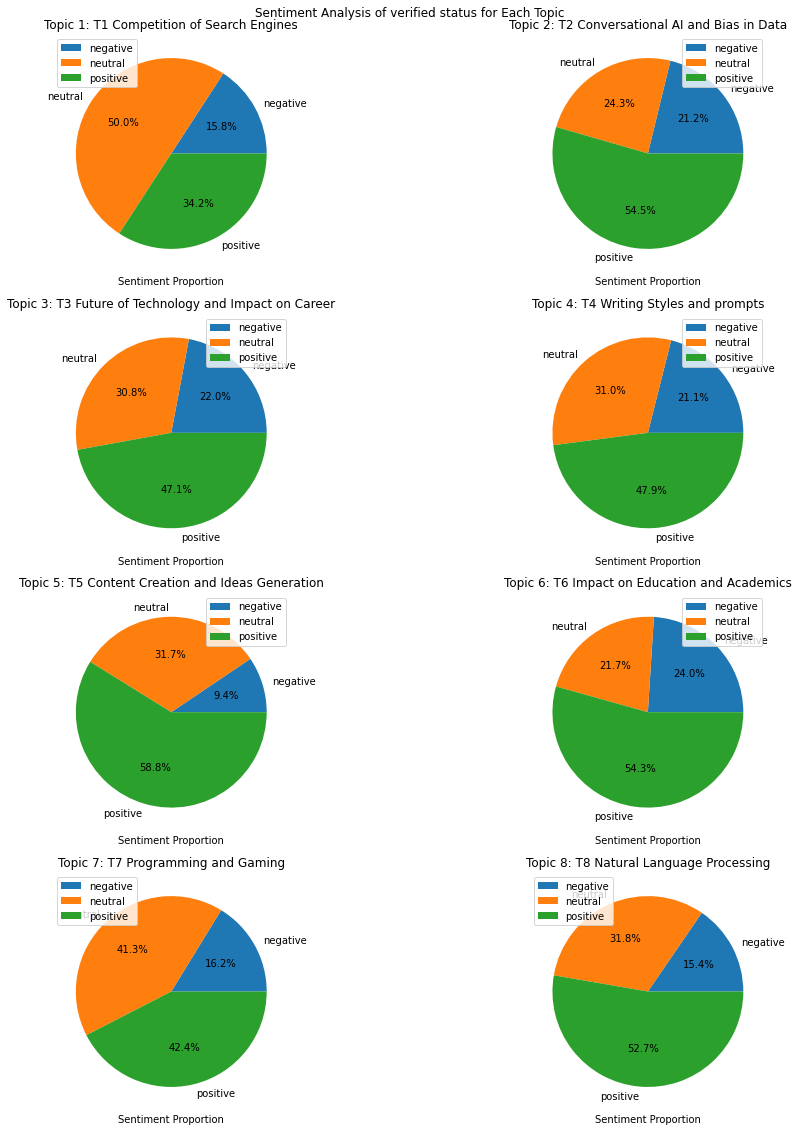

In [30]:
# create subplots
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(16,16))
fig.suptitle('Sentiment Analysis of verified status for Each Topic')

# plot each topic
for i, (topic, topic_df) in enumerate(sentiment_df.groupby('Dominant_Topic')):
    ax = axs[i//2, i%2]  # select the right subplot
    topic_name = topic_df.iloc[0]['Topic_Name']
    ax.set_title(f'Topic {topic}: {topic_name}')
    topic_count = topic_df['count'].sum()
    topic_df['proportion'] = topic_df['count'] / topic_count
    topic_df.plot(kind='pie', y='proportion', labels=topic_df['sentiment'], autopct='%1.1f%%', ax=ax)
    ax.set_xlabel('Sentiment Proportion')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

### Location wise topics mostly discussed

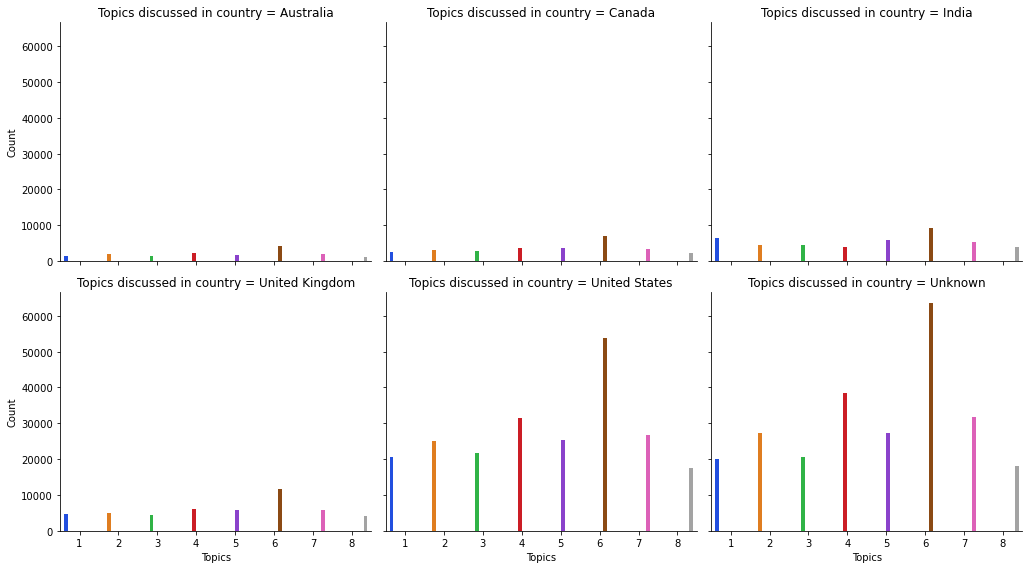

In [31]:
import seaborn as sns

# Define the top 6 locations
top_locations = df['country'].value_counts().nlargest(6).index.tolist()
df_top = df[df['country'].isin(top_locations)]
# Group the data by location and dominant topic
grouped = df_top.groupby(['country', 'Dominant_Topic', 'Topic_Name']).size().reset_index(name='Count')

# Create the grid of plots
g = sns.catplot(x='Dominant_Topic', y='Count', hue='Dominant_Topic', col='country', 
                data=grouped, kind='bar', height=4, aspect=1.2, 
                col_wrap=3, palette='bright')

# Set the title for each subplot
for ax in g.axes.flat:
    ax.set_title(f"Topics discussed in {ax.get_title()}")
    ax.set_xlabel('Topics')
    ax.set_ylabel('Count')

# Adjust the layout and display the plot
#plt.tight_layout()
plt.show()

In [32]:
df.to_excel('Final_Data.xlsx', index=False)